In [1]:
import requests 
import json 

In [6]:
# Lets look at some data for the hot Flooz Gen F Project https://opensea.io/collection/gen-f?tab=activity
headers = {
    "Accept": "application/json",
    "X-API-KEY": "3e34c11abea1452385a6cc3349e09960"
}
# Variables in url
slug = "gen-f"
event_type = "successful"
only_opensea = "true"
limit = "40"

#Time
occured_before = ""
occured_after = ""

url = "https://api.opensea.io/api/v1/events?collection_slug="+slug+"&event_type="+event_type+"&only_opensea=true&offset=0&limit=20"

response = requests.request("GET", url, headers=headers)

# Conver response to iterable 
events = json.loads(response.text)['asset_events']
events

[{'approved_account': None,
  'asset': {'id': 260067390,
   'token_id': '8106',
   'num_sales': 1,
   'background_color': None,
   'image_url': '',
   'image_preview_url': None,
   'image_thumbnail_url': None,
   'image_original_url': None,
   'animation_url': None,
   'animation_original_url': None,
   'name': None,
   'description': None,
   'external_link': None,
   'asset_contract': {'address': '0x369156da04b6f313b532f7ae08e661e402b1c2f2',
    'asset_contract_type': 'non-fungible',
    'created_date': '2022-02-01T16:46:13.277960',
    'name': 'Gen-F',
    'nft_version': '3.0',
    'opensea_version': None,
    'owner': 241774002,
    'schema_name': 'ERC721',
    'symbol': 'GENF',
    'total_supply': '0',
    'description': 'Creatives intersection Web3 and culture. We are here to push the boundaries of what is possible with NFTs.',
    'external_link': 'https://flooz.world',
    'image_url': 'https://lh3.googleusercontent.com/Vr2LqMRAwYyHyP0fm-5RWY-GXrdFOKJuMINf_e9eRWUhPjVx8RH_d1MUMs

In [21]:
# Lets convert Price to eth first 

events[1].keys()




dict_keys(['approved_account', 'asset', 'asset_bundle', 'auction_type', 'bid_amount', 'collection_slug', 'contract_address', 'created_date', 'custom_event_name', 'dev_fee_payment_event', 'dev_seller_fee_basis_points', 'duration', 'ending_price', 'event_type', 'from_account', 'id', 'is_private', 'owner_account', 'payment_token', 'quantity', 'seller', 'starting_price', 'to_account', 'total_price', 'transaction', 'winner_account', 'listing_time'])

In [26]:
#events[1]["total_price"]
events[1]

{'approved_account': None,
 'asset': {'id': 260068379,
  'token_id': '8778',
  'num_sales': 1,
  'background_color': None,
  'image_url': '',
  'image_preview_url': None,
  'image_thumbnail_url': None,
  'image_original_url': None,
  'animation_url': None,
  'animation_original_url': None,
  'name': None,
  'description': None,
  'external_link': None,
  'asset_contract': {'address': '0x369156da04b6f313b532f7ae08e661e402b1c2f2',
   'asset_contract_type': 'non-fungible',
   'created_date': '2022-02-01T16:46:13.277960',
   'name': 'Gen-F',
   'nft_version': '3.0',
   'opensea_version': None,
   'owner': 241774002,
   'schema_name': 'ERC721',
   'symbol': 'GENF',
   'total_supply': '0',
   'description': 'Creatives intersection Web3 and culture. We are here to push the boundaries of what is possible with NFTs.',
   'external_link': 'https://flooz.world',
   'image_url': 'https://lh3.googleusercontent.com/Vr2LqMRAwYyHyP0fm-5RWY-GXrdFOKJuMINf_e9eRWUhPjVx8RH_d1MUMspRGgL49eJhsZX1jK03ksZPojbfV

In [32]:
#events[1]["total_price"]
## 679000000000000000 = 0.679
679000000000000000*.000000000000000001

0.679

In [36]:
#Convert price to eth - my first function on this project!!
def price_to_eth(price):
    eth_multiplier = .000000000000000001
    return float(price) *eth_multiplier
 

In [37]:
price_to_eth(events[1]["total_price"])

0.679

In [40]:
# Okay back to playing with events[1] 
events[1].keys()

dict_keys(['approved_account', 'asset', 'asset_bundle', 'auction_type', 'bid_amount', 'collection_slug', 'contract_address', 'created_date', 'custom_event_name', 'dev_fee_payment_event', 'dev_seller_fee_basis_points', 'duration', 'ending_price', 'event_type', 'from_account', 'id', 'is_private', 'owner_account', 'payment_token', 'quantity', 'seller', 'starting_price', 'to_account', 'total_price', 'transaction', 'winner_account', 'listing_time'])

In [41]:
events[1]['transaction']

{'block_hash': '0x767b35efc8531aadf821064184a9d6f9aff28984b27dee7976c17e23bfe63ee0',
 'block_number': '14130178',
 'from_account': {'user': {'username': None},
  'profile_img_url': 'https://storage.googleapis.com/opensea-static/opensea-profile/1.png',
  'address': '0xa277426d18be7639135fefda6d30b60c6e7511e0',
  'config': ''},
 'id': 264780487,
 'timestamp': '2022-02-03T01:41:13',
 'to_account': {'user': {'username': 'OpenSea-Orders'},
  'profile_img_url': 'https://storage.googleapis.com/opensea-static/opensea-profile/22.png',
  'address': '0x7be8076f4ea4a4ad08075c2508e481d6c946d12b',
  'config': 'verified'},
 'transaction_hash': '0x3c71cb0f8f2031526134ae608b179e8a1be0fe467cf84bbed6409a869458ac26',
 'transaction_index': '214'}

In [42]:
events[1]['transaction']['timestamp']

'2022-02-03T01:41:13'

## Now lets Play Around With A time Block 
The idea here is to build time blocks around specific intervals - say 20 minutes 

We take every event from a 20 minute block for VOLUME DENSITY for the block, and we can ideally go back like 6 blocks

In [81]:
# Fitst we have to get the current time 
import time 
import calendar 
epoch_time = int(time.time()) # We have to do this in real time - in the same block 
epoch_time

# 20 min ago 

twenty_min = epoch_time - (20 *60)
print(twenty_min)
print(epoch_time)

1643937487
1643938687


In [96]:
currenttime = int(time.time())
block = 1
limit = "20"
    #specifiy time block using start and end 
occurredbefore = currenttime - (20*(block-1))
occurredafter = currenttime - (20*block)

currenttime = int(time.time())
print(occurredbefore)
print(occurredafter)
    # define url
url = "https://api.opensea.io/api/v1/events?collection_slug="+slug+"&event_type=successful&only_opensea=true&offset=0&limit="+limit+"&occurred_before="+str(occured_before)+"&occurred_after="+str(occured_after)
    
    #define headers
headers = {
    "Accept": "application/json",
    "X-API-KEY": "3e34c11abea1452385a6cc3349e09960"
}
    
    #make api call
response = requests.request("GET", url, headers=headers)
response.text

'{"occurred_before":["invalid datetime format"],"occurred_after":["invalid datetime format"]}'

In [99]:
currenttime = int(time.time())
block = 1
limit = "20"
    #specifiy time block using start and end 
occurredbefore = currenttime - (20*(block-1))
occurredafter = currenttime - (20*block*60)

currenttime = int(time.time())
print(currenttime)
print(occurredbefore)
print(occurredafter)

1643943639
1643943639
1643942439


In [ ]:
# I want to write a function that takes in the number of blocks back I want to count as a parameter (1,2,3)
# where each block corresponds to a different time interval  1 = past 20 minutes, 2 = 20 mi - 40 min ago - 3 = 40-60Minutes ago
# it returns the a list of events (sales)
# it prints the number of events in the block (volume density)

In [136]:
def get_events_for_block(slug,limit,block):
    currenttime = int(time.time())
    
    #specifiy time block using start and end 
    occurredbefore = str(currenttime - (20*60*(block-1)))
    occurredafter = str(currenttime - (20*60*block))
    
    #print(currenttime)
   #print(occurredbefore)
   # print(occurredafter)
    
    # define url
    url = "https://api.opensea.io/api/v1/events?collection_slug="+slug+"&event_type=successful&only_opensea=true&offset=0&limit="+limit+"&occurred_before="+occurredbefore+"&occurred_after="+occurredafter
    
    #define headers
    headers = {
    "Accept": "application/json",
    "X-API-KEY": "3e34c11abea1452385a6cc3349e09960"
    }
    
    #make api call
    response = requests.request("GET", url, headers=headers)
    
    #Convert to iterable list
    events = json.loads(response.text)
    
    print(len(events["asset_events"]))
    return events

In [167]:
get_events_for_block("raidpartyfighters","300",2)

13


{'asset_events': [{'approved_account': None,
   'asset': {'id': 262926709,
    'token_id': '5466',
    'num_sales': 2,
    'background_color': None,
    'image_url': 'https://lh3.googleusercontent.com/OyYvMx1DF1-J8nBin7dNQA8I1VKfKmZ7S-zl7D1sjFiB6xBQvy_ZP3lZ0OeduINPc_wpmyiiUcTl4YDRqAnq0vVxVzW5mdfqqwhOxA',
    'image_preview_url': 'https://lh3.googleusercontent.com/OyYvMx1DF1-J8nBin7dNQA8I1VKfKmZ7S-zl7D1sjFiB6xBQvy_ZP3lZ0OeduINPc_wpmyiiUcTl4YDRqAnq0vVxVzW5mdfqqwhOxA=s250',
    'image_thumbnail_url': 'https://lh3.googleusercontent.com/OyYvMx1DF1-J8nBin7dNQA8I1VKfKmZ7S-zl7D1sjFiB6xBQvy_ZP3lZ0OeduINPc_wpmyiiUcTl4YDRqAnq0vVxVzW5mdfqqwhOxA=s128',
    'image_original_url': 'https://cdn.raid.party/fighter/0.gif',
    'animation_url': None,
    'animation_original_url': None,
    'name': 'Fighter #5466',
    'description': 'RaidParty - Fighter',
    'external_link': None,
    'asset_contract': {'address': '0x87e738a3d5e5345d6212d8982205a564289e6324',
     'asset_contract_type': 'non-fungible',
 

In [114]:
url = "https://api.opensea.io/api/v1/events?collection_slug="+slug+"&event_type=successful&only_opensea=true&offset=0&limit=20&occurred_before=1643943639&occurred_after=1643942439"

    
    #define headers
headers = {
    "Accept": "application/json",
    "X-API-KEY": "3e34c11abea1452385a6cc3349e09960"
}
    
    #make api call
response = requests.request("GET", url, headers=headers)

In [116]:
events = json.loads(response.text)
len(events["asset_events"])

4

In [137]:
import numpy as np 


for i in range(1,20,1):
    ievents = get_events_for_block("raidpartyfighters","200",i)
    array = np.append([i,len(ievents)])


30
30
26
10
30
15
48
29
23
25
90
36
17
18
17
14
23
44
28
31


In [180]:
# Refreshing with arrays 

myarray = np.array([0,0])
newarray = np.append(myarray,[2,2])
newarray1 = np.vstack([myarray,[2,2]])
newarray1


array([[0, 0],
       [2, 2]])

In [156]:
# More review with arrays 

newarray = np.array([0,0])
for i in range(1,21,1):
    newarray = np.vstack([newarray,[i,i*2]])
newarray


array([[ 0,  0],
       [ 1,  2],
       [ 2,  4],
       [ 3,  6],
       [ 4,  8],
       [ 5, 10],
       [ 6, 12],
       [ 7, 14],
       [ 8, 16],
       [ 9, 18],
       [10, 20],
       [11, 22],
       [12, 24],
       [13, 26],
       [14, 28],
       [15, 30],
       [16, 32],
       [17, 34],
       [18, 36],
       [19, 38],
       [20, 40]])

In [179]:
# okay lets try this again 

array = np.array([0,0])
for i in range(1,11,1):
    os_events_list = get_events_for_block("raidpartyfighters","200",i)['asset_events']
    array = np.vstack([array,[i,len(os_events_list)]])

print(array)
    
    


1
0
2
10
8
7
16
8
9
1
[[ 0  0]
 [ 1  1]
 [ 2  0]
 [ 3  2]
 [ 4 10]
 [ 5  8]
 [ 6  7]
 [ 7 16]
 [ 8  8]
 [ 9  9]
 [10  1]]


In [181]:
array

array([[ 0,  0],
       [ 1,  1],
       [ 2,  0],
       [ 3,  2],
       [ 4, 10],
       [ 5,  8],
       [ 6,  7],
       [ 7, 16],
       [ 8,  8],
       [ 9,  9],
       [10,  1]])

In [203]:
# Deleting the first row of a 2d array 

newarray = np.delete(array,[0],axis=0)
print(newarray)

#Slicing the array 
print(newarray[0:10,1])

[[ 1  1]
 [ 2  0]
 [ 3  2]
 [ 4 10]
 [ 5  8]
 [ 6  7]
 [ 7 16]
 [ 8  8]
 [ 9  9]
 [10  1]]
[ 1  0  2 10  8  7 16  8  9  1]


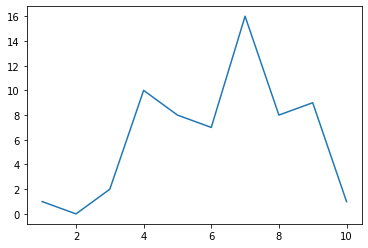

In [204]:
# Plotting the array 
import matplotlib.pyplot as plt
x = newarray[0:len(newarray),0]
y = newarray[0:len(newarray),1]

plt.plot(x,y)